## 7c) Detect lane pixels and fit to find the lane boundary. (looping sliding window) 

../test_images/test1.jpg


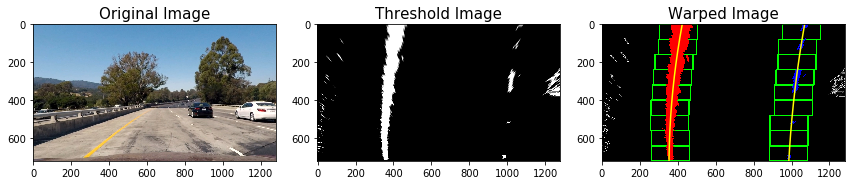

../test_images/test2.jpg


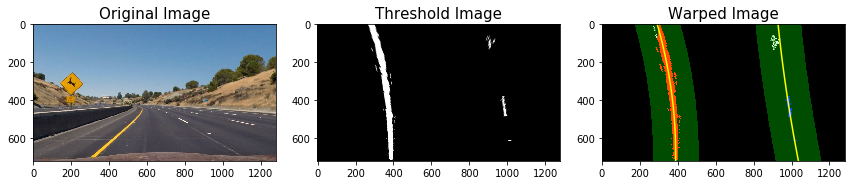

../test_images/test3.jpg


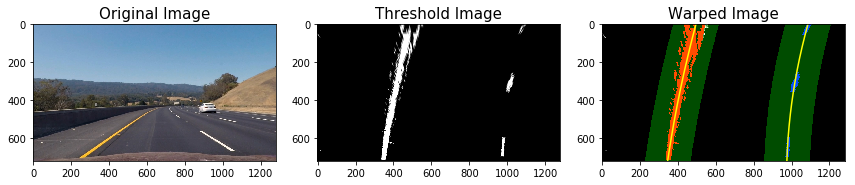

../test_images/test4.jpg


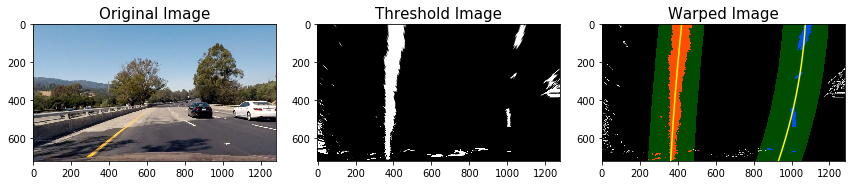

../test_images/test5.jpg


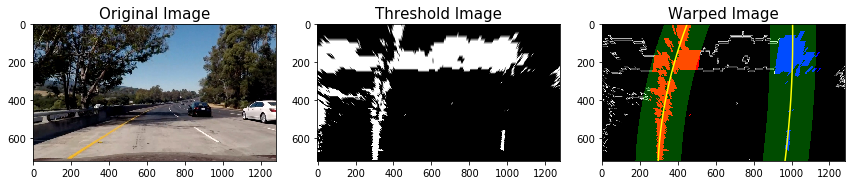

../test_images/test6.jpg


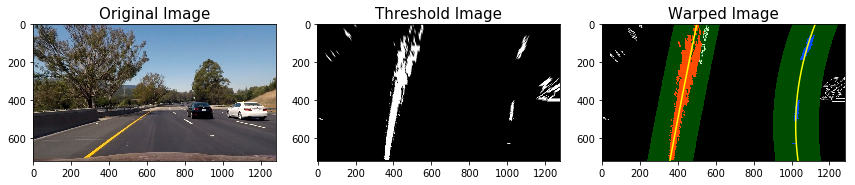

In [8]:
%run 'imports.py'
%run 'testbed_misc.py'

list_left_fitx = []
list_right_fitx = []
list_ploty = []
im_images = list() # variable used in 8a)
th_images = list() # variable used in 8a)
images = glob.glob('../test_images/test*.jpg')
for img_idx, fname in enumerate(images):
    print(fname)
    
    img = mpimg.imread(fname)
    img_undist = cal_undistort(img)
    threshold_img = threshold_pipeline(img_undist, Settings.thresholds, ksize=23, debug=False)
    img_warp, _, _ = warp_image(threshold_img)
    im_images.append(img_undist)
    th_images.append(img_warp)
    binary_warped = np.asarray(img_warp)

    if img_idx == 0:
        lane_lines_image, left_fitx, right_fitx, ploty, init_left_fit, init_right_fit, x_pts, y_pts = \
            sliding_window_line_search(img_warp, 100, Settings.nwindows, 50)
    else:
        lane_lines_image, left_fitx, right_fitx, ploty, left_fit, right_fit, x_pts, y_pts = \
            bounded_window_line_search(img_warp, 120, init_left_fit, init_right_fit)

    list_left_fitx.append(left_fitx)
    list_right_fitx.append(right_fitx)
    list_ploty.append(ploty)
    _, _, ax3 = visualize_images(img_undist, binary_warped, lane_lines_image)
    ax3.plot(left_fitx, ploty, color='yellow')
    ax3.plot(right_fitx, ploty, color='yellow')

    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()


## 8b) Warp the detected lane boundaries back onto the original image. (loop)

../test_images/test1.jpg


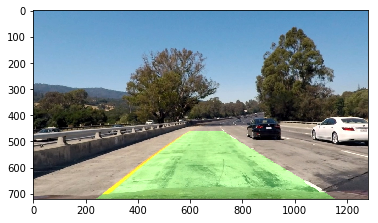

../test_images/test2.jpg


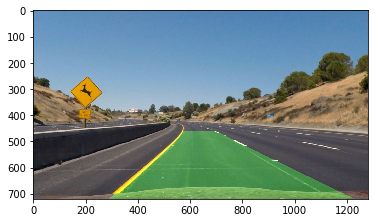

../test_images/test3.jpg


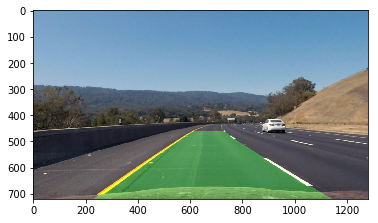

../test_images/test4.jpg


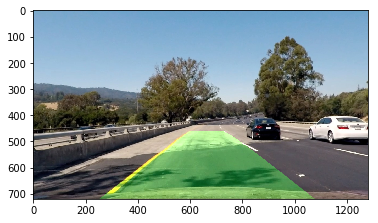

../test_images/test5.jpg


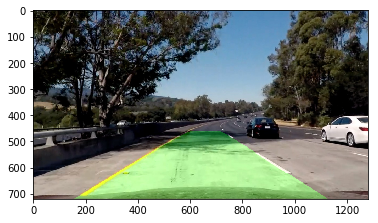

../test_images/test6.jpg


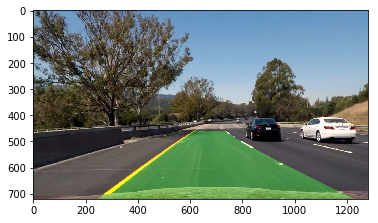

In [9]:

warp_transform = pickle.load( open( "warp_transform.p", "rb" ) )
M = warp_transform["M"]
Minv = warp_transform["Minv"]

for img_idx, fname in enumerate(images):
    print(fname)
    
    warped = np.asarray(th_images[img_idx])
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([list_left_fitx[img_idx], list_ploty[img_idx]]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([list_right_fitx[img_idx], list_ploty[img_idx]])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    new_warp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(im_images[img_idx], 1, new_warp, 0.3, 0)
    
    plt.imshow(result)
    plt.show()